## Linear Regrssion Pipeline

In [130]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/cleaned/toyota_stock.csv")
df.set_index('Date', inplace=True)

In [131]:
X = df[[ 'Open']]
y = df[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(X_train,y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [133]:
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 5.1131029533658205
RMSE: 6.7053334624627325
R²: 0.9821116287671563


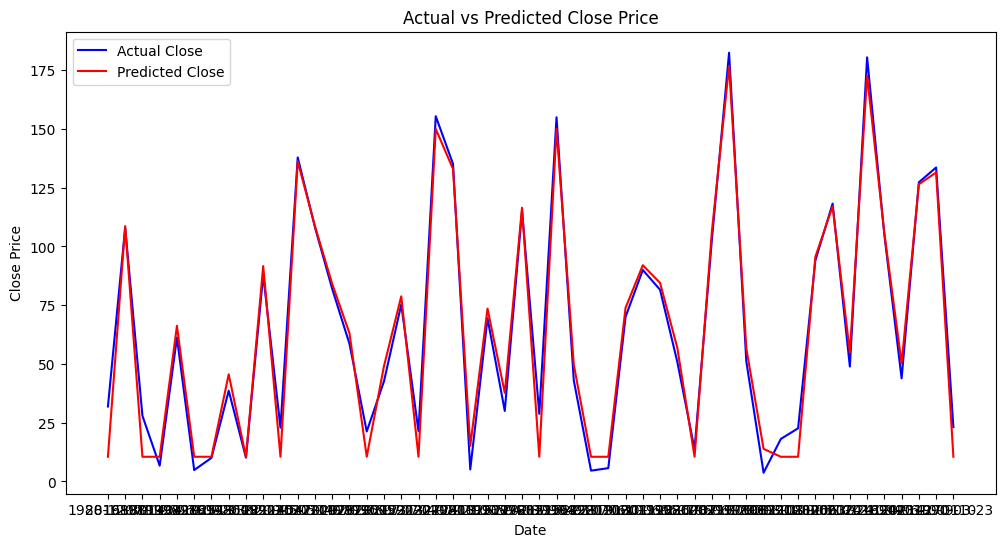

In [134]:
y_test_small = y_test.iloc[:50]
y_pred_small = y_pred[:50]

plt.figure(figsize=(12,6))

# Plot actual Close prices
plt.plot(y_test_small.index, y_test_small.values, label="Actual Close", color="blue")

# Plot predicted Close prices
plt.plot(y_test_small.index, y_pred_small, label="Predicted Close", color="red")

plt.title("Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [135]:
import pickle
# Save ARIMA model
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)